In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results_output_size_eps_size_theta.csv')
df.head()

,n,dim,degree,epsnet_size_ratio,output_size,random_recall,theta_recall,knn_recall,linear_recall,random_time,theta_time,knn_time,linear_time
0,2000,32,16,0.06250,0.125000,0.967871,1.000000,0.959839,1.0,0.008911,0.008817,0.008036,0.007577
1,2000,32,16,0.06250,0.031250,0.266667,0.083333,0.116667,1.0,0.002304,0.000626,0.001092,0.007698
2,2000,32,16,0.06250,0.007812,0.000000,0.071429,0.000000,1.0,0.000502,0.000622,0.000528,0.007821
3,2000,32,16,0.03125,0.125000,0.975806,1.000000,0.991935,1.0,0.008424,0.008382,0.006725,0.007473
4,2000,32,16,0.03125,0.031250,0.016667,0.016667,0.100000,1.0,0.000413,0.000336,0.000713,0.007649


## Recall

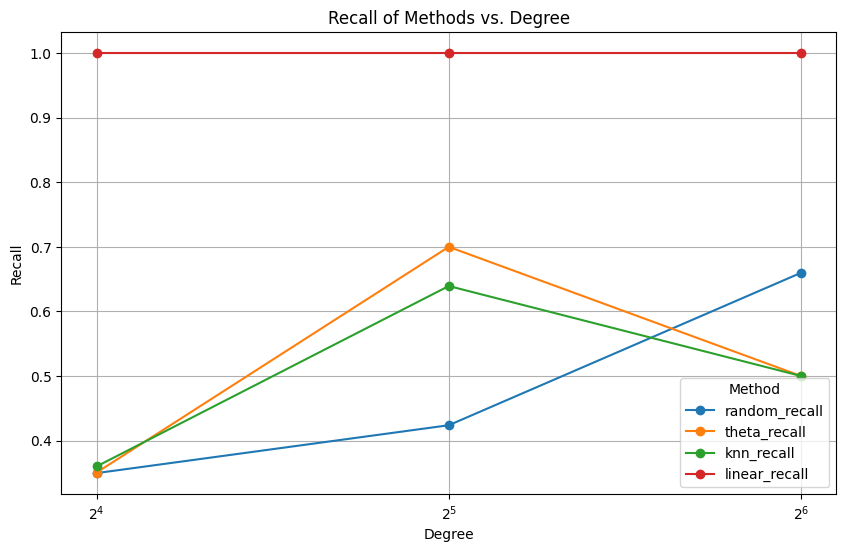

In [3]:
# Group by 'degree' and calculate the mean for the recall columns
recall_by_degree = df.groupby('degree')[['random_recall', 'theta_recall', 'knn_recall', 'linear_recall']].mean()

# Plot the recall values with dots for points
recall_by_degree.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Recall of Methods vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Recall')
plt.xscale('log', base=2)
plt.legend(title='Method')
plt.grid(True)
plt.show()

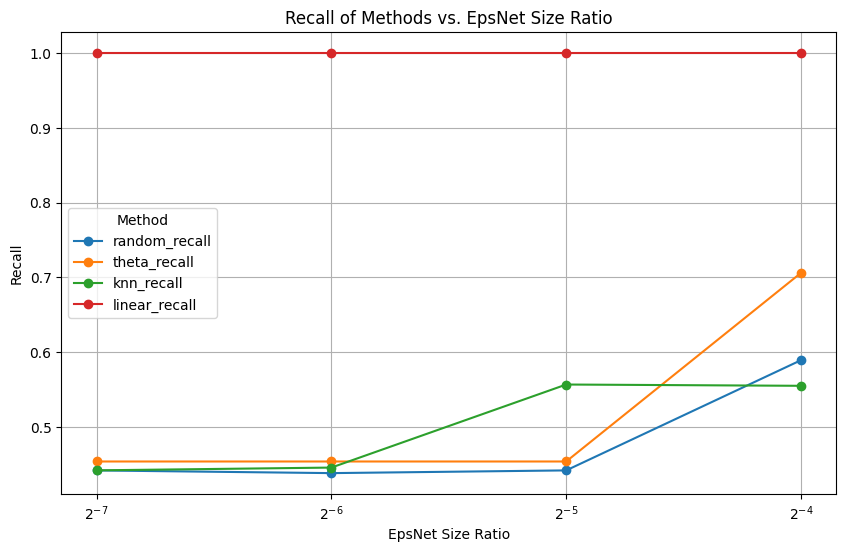

In [ ]:
# Group by 'epsnet_size_ratio' and calculate the mean for the recall columns
recall_by_epsnet_size = df.groupby('epsnet_size_ratio')[['random_recall', 'theta_recall', 'knn_recall', 'linear_recall']].mean()

# Plot the recall values
recall_by_epsnet_size.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Recall of Methods vs. EpsNet Size Ratio')
plt.xlabel('EpsNet Size Ratio')
plt.ylabel('Recall')
plt.xscale('log', base=2)
plt.legend(title='Method')
plt.grid(True)
plt.show()
# we usually have large connected-comp.
# small eps is enough

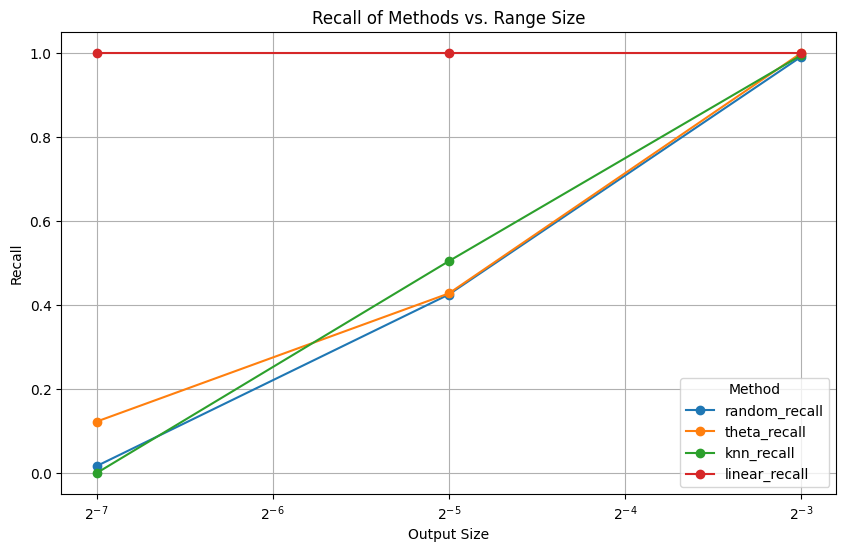

In [ ]:
recall_by_output_size = df.groupby('output_size')[['random_recall', 'theta_recall', 'knn_recall', 'linear_recall']].mean()

# Plot the recall values with dots for points
recall_by_output_size.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Recall of Methods vs. Range Size')
plt.xlabel('Output Size')
plt.ylabel('Recall')
plt.xscale('log', base=2)
plt.legend(title='Method')
plt.grid(True)
plt.show()
# TODO: 2^{-10, 8} narrower range
# TODO: Isolate BFS part, assuming inside points given by an oracle

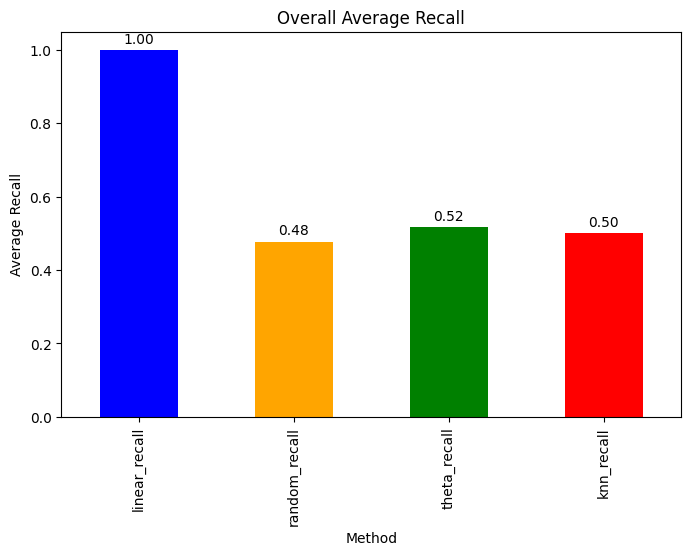

In [ ]:
# Calculate the mean of the recall columns across the whole dataset
average_recall = df[['linear_recall', 'random_recall', 'theta_recall', 'knn_recall']].mean()

# Define colors for each bar
recall_colors = ['blue', 'orange', 'green', 'red']

# Plot the average recall with specific colors for each bar
ax = average_recall.plot(kind='bar', figsize=(8, 5), color=recall_colors)
plt.title('Overall Average Recall')
plt.xlabel('Method')
plt.ylabel('Average Recall')

# Add numbers on top of the bars
for i, value in enumerate(average_recall):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()
# TODO: other distributions
# TODO: larger point-set, narrower srtipe.

## Time

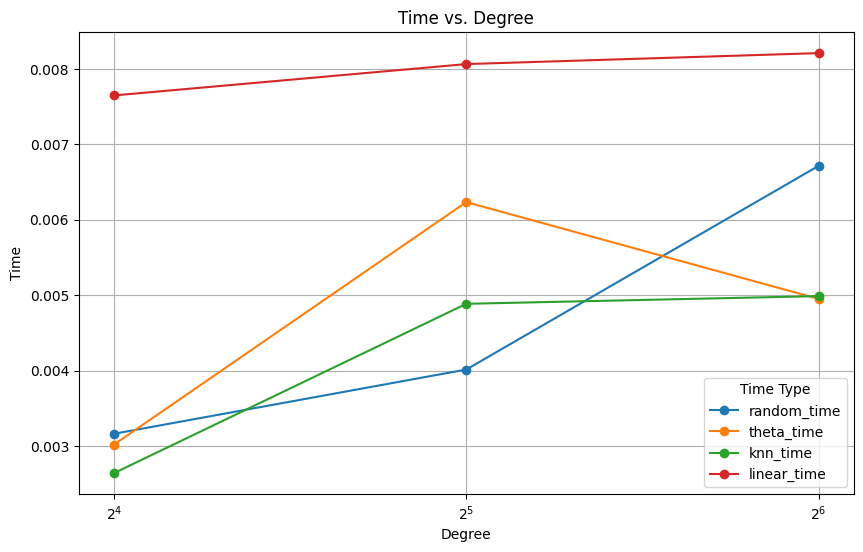

In [8]:
# Plot the average times for each degree
avg_time_by_degree = df.groupby('degree')[['random_time', 'theta_time', 'knn_time', 'linear_time']].mean()
avg_time_by_degree.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Time vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Time')
plt.grid(True)
plt.xscale('log', base=2)
plt.legend(title='Time Type')
plt.show()

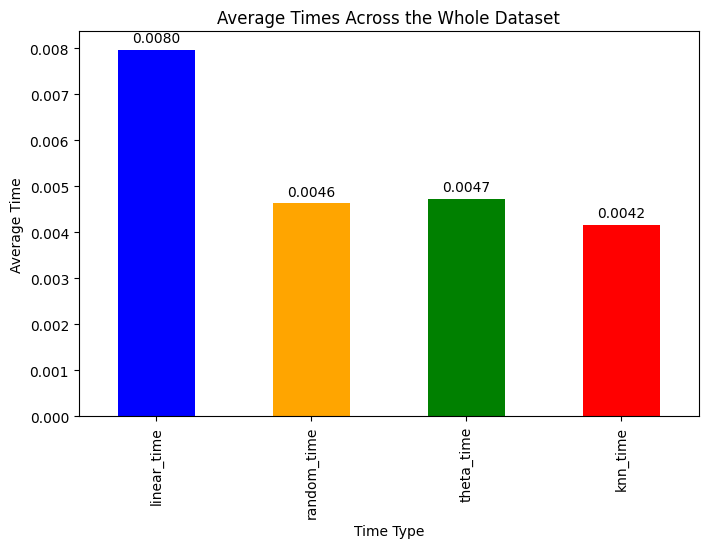

In [ ]:
# Calculate the mean of the time columns across the whole dataset
average_times = df[['linear_time', 'random_time', 'theta_time', 'knn_time']].mean()
# Define colors for each bar
colors = ['blue', 'orange', 'green', 'red']

# Plot the average times with specific colors for each bar
ax = average_times.plot(kind='bar', figsize=(8, 5), color=colors)
plt.title('Average Times Across the Whole Dataset')
plt.xlabel('Time Type')
plt.ylabel('Average Time')

# Add numbers on top of the bars
for i, value in enumerate(average_times):
    ax.text(i, value + 0.0001, f'{value:.4f}', ha='center', va='bottom')

plt.show()
